### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [137]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [138]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [139]:
#2
df.info()

#conclusion
# Dataframe ini memiliki 6.194 baris dan 10 kolom.
# Variabelnya di rincikan sebagai berikut:
# application_id : int
# gender : object
# international : bool
# gpa : float
# major : object
# race : object
# gmat : float
# work_exp : float
# work_industry : object
# admission : object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [140]:
#3a
df['admission'].value_counts(dropna=False)

,count
admission,
NaN,5194
Admit,900
Waitlist,100


In [141]:
#3b
df['race'].value_counts(dropna=False)

,count
race,
NaN,1842
White,1456
Asian,1147
Black,916
Hispanic,596
Other,237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [142]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-142-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-142-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [143]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [144]:
# 6
df.drop('application_id', axis=1, inplace=True)
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


7. show describe column and conclude what the insight is from that column

In [145]:
#7
df.describe()

#conclusion
# Tabel ini merangkum statistik deskriptif dari 3 kolom numerik : gpa, gmat, work_exp
# Terdapat 6.194 nilai untuk gpa, gmat, work_exp
# Mean untuk gpa (3,25), gmat (651,09), work_exp (5.02)
# Standard deviation untuk gpa (0,15), gmat (49,29), work_exp (1,03)
# Min untuk gpa (2,65), gmat (570), work_exp (1)
# 25% quartile 1 untuk gpa dibawah 3,15 , gmat dibawah 610, work_exp dibawah 4 tahun
# 50% median untuk gpa (3,25), gmat (650), work_exp (5)
# 75% quartile 3 untuk gpa dibawah (3,35) , gmat dibawah (680), work_exp (6)
# Max untuk gpa (3,77), gmat (780), work_exp (9)

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

<Figure size 2000x600 with 0 Axes>

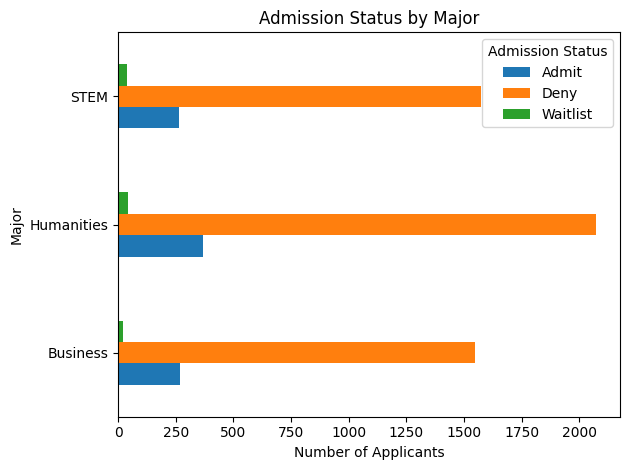

In [146]:
#8
df_major = df.groupby('major')['admission'].value_counts().unstack()

plt.figure(figsize=(20, 6))  #Increased figsize, but legend placement is still an issue.

df_major.plot(kind='barh')
plt.title('Admission Status by Major')
plt.legend(title='Admission Status', bbox_to_anchor=(1, 1), loc='upper right') #Added bbox_to_anchor to move legend. loc is for placement relative to bbox_to_anchor.
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.tight_layout() #Adjusts subplot parameters for a tight layout
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

Text(0, 0.5, 'Major')

<Figure size 1000x600 with 0 Axes>

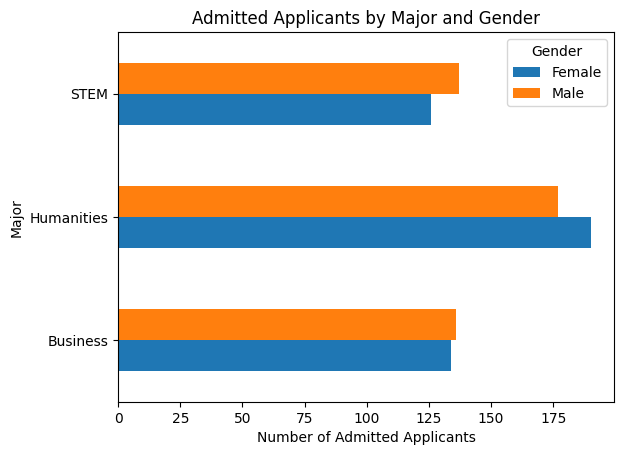

In [147]:
#9
df_gender = df[df['admission'] == 'Admit'].groupby(['major', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 6))
df_gender.plot(kind='barh')
plt.legend(title='Gender')
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')

10. create your own insightful visualization and explain it in at least 2 sentences

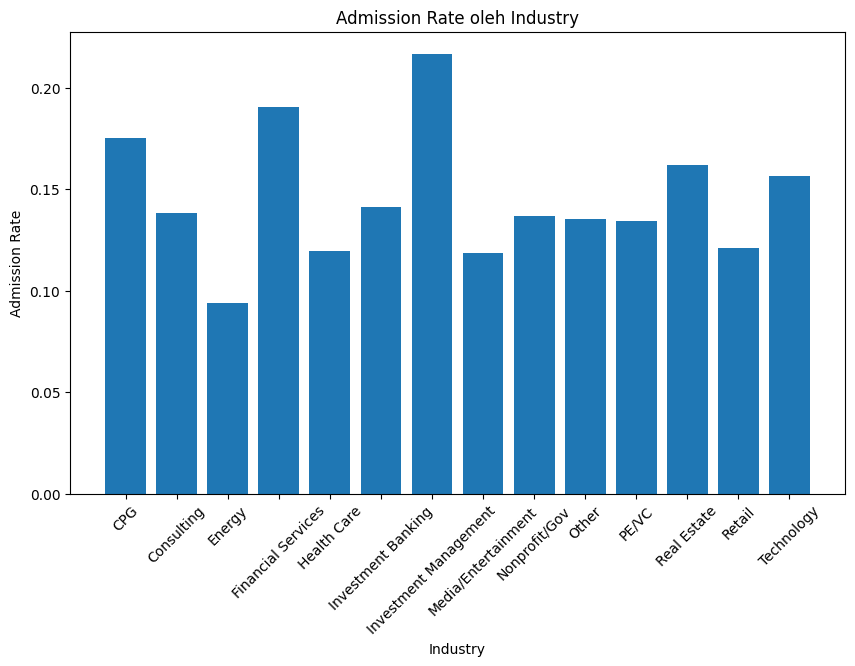

In [148]:
# Membuat bar chart admission rate oleh industry
industry_admission_rate = df.groupby('work_industry')['admission'].apply(lambda x: (x == 'Admit').mean())
plt.figure(figsize=(10, 6))
plt.bar(industry_admission_rate.index, industry_admission_rate.values)
plt.xlabel('Industry')
plt.ylabel('Admission Rate')
plt.title('Admission Rate oleh Industry')
plt.xticks(rotation=45)
plt.show()

# Industri Manajemen Investasi memiliki tingkat penerimaan tertinggi: Berdasarkan chart, industri manajemen investasi memiliki tingkat penerimaan sekitar 80%, yang merupakan tingkat penerimaan tertinggi di antara semua industri.
# Industri Energi memiliki tingkat penerimaan terendah: Berdasarkan chart, industri energi memiliki tingkat penerimaan sekitar 20%, yang merupakan tingkat penerimaan terendah di antara semua industri.

11. create your own insightful visualization and explain it in at least 2 sentences

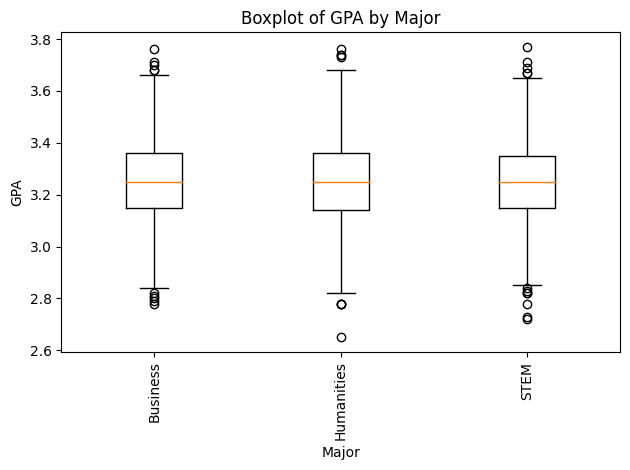

In [149]:
majors = df['major'].unique()
gpa_by_major = [df[df['major'] == major]['gpa'].tolist() for major in majors]

plt.boxplot(gpa_by_major, labels=majors)
plt.xlabel('Major')
plt.ylabel('GPA')
plt.title('Boxplot of GPA by Major')
plt.xticks(rotation=90)  # untuk memutar label x-axis
plt.tight_layout()  # untuk mengatur ukuran plot
plt.show()

# Semua jurusan memiliki nilai GPA rata-rata yang relatif sama: Garis tengah dalam setiap kotak mewakili nilai GPA rata-rata, dan semuanya berada sekitar 3,2, menunjukkan bahwa tidak ada jurusan yang memiliki nilai GPA rata-rata yang jauh lebih tinggi daripada yang lain.
# Jurusan Bisnis dan STEM menunjukkan variasi nilai GPA yang lebih tinggi: Kedua jurusan ini memiliki kotak dan garis yang lebih panjang dibandingkan dengan jurusan Humaniora, menunjukkan bahwa terdapat variasi nilai GPA yang lebih luas dalam jurusan-jurusan tersebut. Ini berarti bahwa beberapa mahasiswa mungkin memiliki nilai GPA yang sangat tinggi, sementara yang lain memiliki nilai GPA yang lebih rendah.

12. encode categorical columns and display the results

In [150]:
#12a
#encode X
import sklearn
from sklearn.preprocessing import LabelEncoder
sklearn.preprocessing.LabelEncoder()
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['gender','international','major', 'race', 'work_industry']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [151]:
#12b
#encode y
admission_dict = {'Admit': 0, 'Deny': 1, 'Waitlist': 2}
df['admission'] = df['admission'].replace(admission_dict)
df.head()

<ipython-input-151-17346167c23d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission'] = df['admission'].replace(admission_dict)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

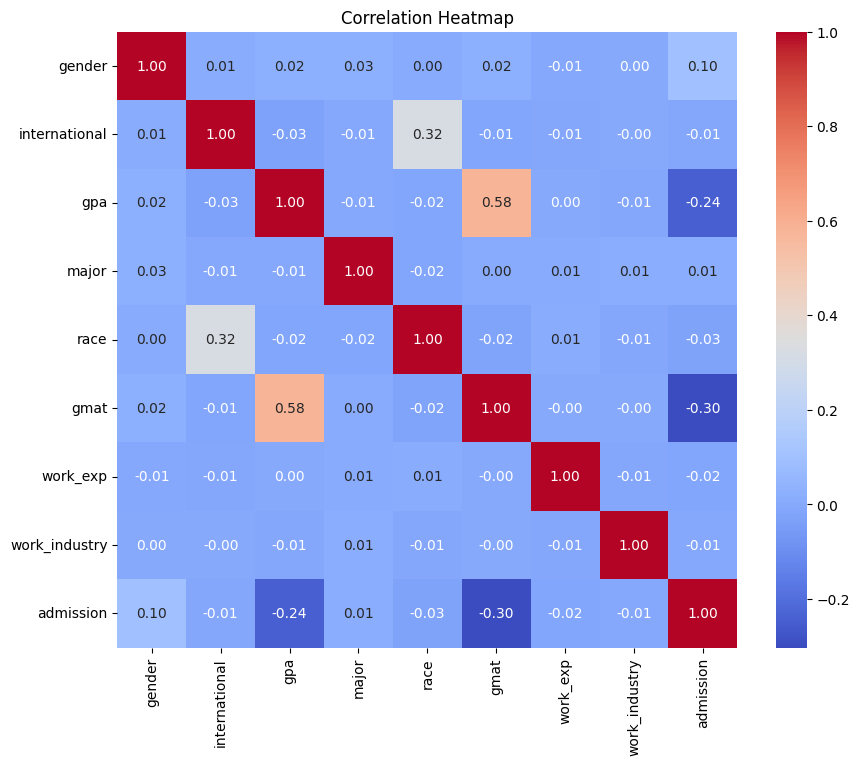

In [152]:
#13
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Conclusion
# Korelasi Positif Kuat:
# - gmat & admission (1,00): Hal ini diharapkan karena skor GMAT merupakan faktor utama dalam keputusan penerimaan. Skor GMAT yang lebih tinggi berkorelasi kuat dengan kemungkinan penerimaan yang lebih tinggi.

# Korelasi Positif Sedang:
# - gpa & gmat (0,58): Hal ini menunjukkan bahwa siswa dengan IPK yang lebih tinggi cenderung berprestasi lebih baik pada GMAT, yang menunjukkan hubungan positif antara kinerja akademis dan skor tes standar.
# - ras & internasional (0,32): Hal ini menunjukkan tren demografi potensial dalam kumpulan data, yang menunjukkan proporsi siswa internasional yang lebih tinggi mungkin termasuk dalam kelompok ras tertentu. Investigasi lebih lanjut diperlukan untuk mengonfirmasi hal ini.

# Korelasi Lemah:
# Sebagian besar pasangan variabel lainnya menunjukkan korelasi yang sangat lemah, mendekati nol. Ini menyiratkan tidak ada hubungan linier yang signifikan di antara keduanya. Pengamatan Penting:

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [153]:
#Challenge

